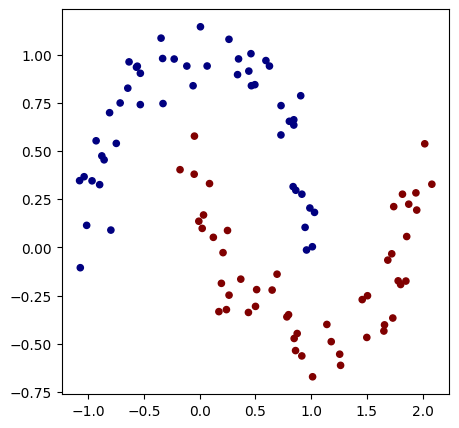

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import neural_net as nn
from engine import Value
from neural_net import mse_loss

X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')


In [2]:
mlp = nn.MLP(2, [16, 16, 1], act = 'relu')


def loss(batch_size=None):

    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]

    # forward the model to get scores
    scores = list(map(mlp, inputs))

    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in mlp.parameters()))
    total_loss = data_loss + reg_loss

    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)


for epoch in range(100):
    # forward pass
    total_loss, acc = loss()

    # backward
    total_loss.backward()

    lr = 1.0 - 0.9* epoch/100

    for p in mlp.parameters():
        p.data += -lr * p.grad

    if epoch % 1 == 0:
            print(f"step {epoch} loss {total_loss.data}, accuracy {acc*100}%")




data = 1.4189729319311848 0.38
step 0 loss 1.4189729319311848, accuracy 38.0%
step 1 loss 0.9752858079821322, accuracy 50.0%
step 2 loss 1.6149040152069671, accuracy 50.0%
step 3 loss 0.6847078568904065, accuracy 77.0%
step 4 loss 0.46472089908951025, accuracy 83.0%
step 5 loss 0.5183180499721993, accuracy 82.0%
step 6 loss 0.42189052439655444, accuracy 82.0%
step 7 loss 0.2765395595517721, accuracy 88.0%
step 8 loss 0.215627439188278, accuracy 90.0%
step 9 loss 0.18679271182242052, accuracy 93.0%
step 10 loss 0.17510517433814496, accuracy 93.0%
step 11 loss 0.15892400593010206, accuracy 97.0%
step 12 loss 0.45466217295833294, accuracy 84.0%
step 13 loss 0.3033337966843698, accuracy 92.0%
step 14 loss 0.199983825287115, accuracy 92.0%
step 15 loss 0.12212905914995864, accuracy 94.0%
step 16 loss 0.08275428480519104, accuracy 97.0%
step 17 loss 0.06224606688055457, accuracy 99.0%
step 18 loss 0.0639240539221175, accuracy 100.0%
step 19 loss 0.10185882248114081, accuracy 96.0%
step 20 lo

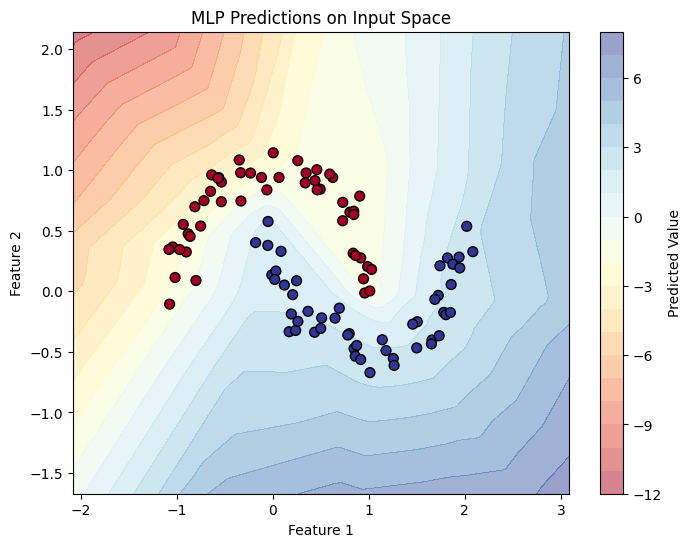

In [3]:
# Create a grid over the input space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict on each grid point
grid_inputs = [[Value(x), Value(y)] for x, y in zip(xx.ravel(), yy.ravel())]
grid_preds = [mlp(inp).data for inp in grid_inputs]
Z = np.array(grid_preds).reshape(xx.shape)

# Plot the prediction contours (colored by predicted value)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='RdYlBu', alpha=0.5, levels=20)
plt.colorbar(label='Predicted Value')

# Overlay the original data points colored by true labels
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='k', s=50)
plt.title('MLP Predictions on Input Space')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()